# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
soup = BeautifulSoup(browser.html, 'html.parser')

In [5]:
# Extract all rows of data
row_data=soup.find_all('tr',class_='data-row')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
data=[]

# Loop through the scraped data to create a list of rows
for row in row_data:
    cells = row.find_all('td')
    
    data.append({
        'id': cells[0].text,
        'terrestrial_date': cells[1].text,
        'sol': cells[2].text,
        'ls': cells[3].text,
        'month': cells[4].text,
        'min_temp': cells[5].text,
        'pressure': cells[6].text
    })

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(data)

In [8]:
# Confirm DataFrame was created successfully
df.head(5)

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [10]:
# Change data types for data analysis
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df['sol'] = pd.to_numeric(df['sol'])
df['ls'] = pd.to_numeric(df['ls'])
df['month'] = pd.to_numeric(df['month'])
df['min_temp'] = pd.to_numeric(df['min_temp'])
df['pressure'] = pd.to_numeric(df['pressure'])

In [11]:
# Confirm type changes were successful by examining data types again
df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
month=df['month'].nunique()
month

12

In [13]:
# 2. How many sols (Martian days) worth of data are there?
sol=df['sol'].nunique()
sol

1867

In [33]:
# 3. What is the average minimum temperature by month?
avg_min_temp_by_month = df.groupby('month')['min_temp'].mean()
avg_min_temp_by_month

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

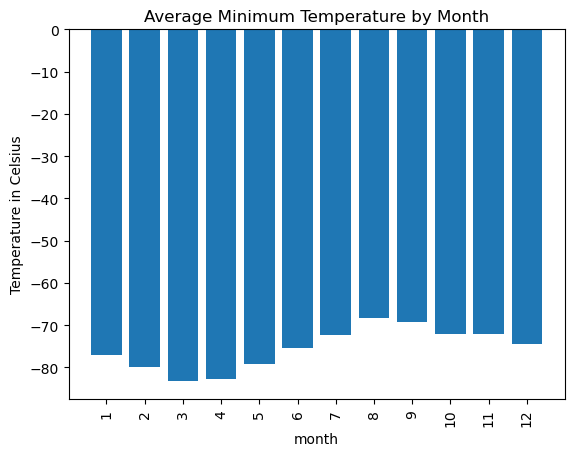

In [35]:
# Plot the average minimum temperature by month
avg_min_temp_by_month = avg_min_temp_by_month.reset_index()
plt.bar(avg_min_temp_by_month['month'],avg_min_temp_by_month['min_temp'])
plt.title('Average Minimum Temperature by Month')
plt.xlabel('month')
plt.ylabel('Temperature in Celsius')
plt.xticks(avg_min_temp_by_month['month'],rotation=90)
plt.show()

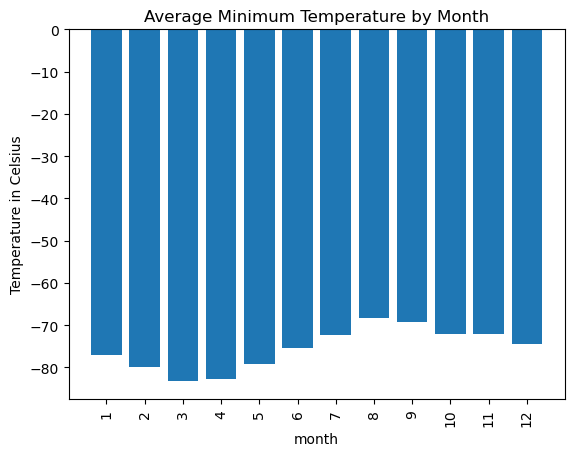

In [37]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
avg_sorted = avg_min_temp_by_month.sort_values('min_temp')

coldest_month = avg_sorted.iloc[0]
hottest_month = avg_sorted.iloc[-1]


plt.bar(avg_sorted['month'], avg_sorted['min_temp'])
plt.title('Average Minimum Temperature by Month')
plt.xlabel('month')
plt.ylabel('Temperature in Celsius')
plt.xticks(avg_sorted['month'],rotation=90)
plt.show()

In [38]:
# 4. What is the average pressure by month?
avg_pressure_by_month = df.groupby('month')['pressure'].mean()
avg_pressure_by_month

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

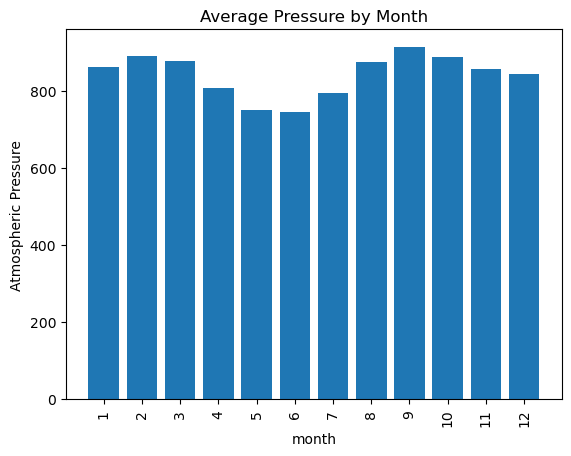

In [39]:
# Plot the average pressure by month
avg_pressure_by_month=avg_pressure_by_month.reset_index()
plt.bar(avg_pressure_by_month['month'],avg_pressure_by_month['pressure'])
plt.title('Average Pressure by Month')
plt.xlabel('month')
plt.ylabel('Atmospheric Pressure')
plt.xticks(avg_pressure_by_month['month'],rotation=90)
plt.show()

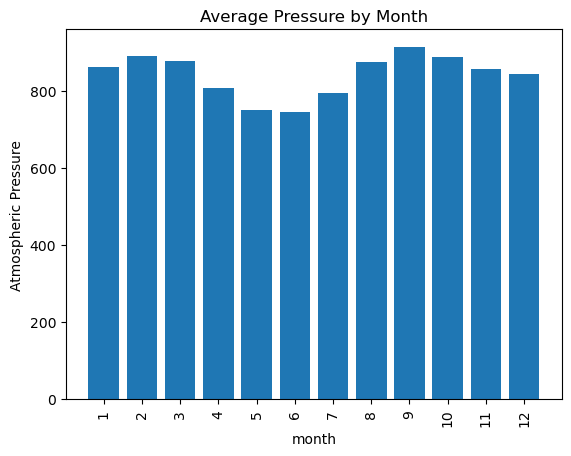

In [40]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
avg_pressure_by_month_sorted = avg_pressure_by_month.sort_values('pressure')

# Identify the lowest and highest pressure months
lowest_pressure_month = avg_pressure_by_month_sorted.iloc[0]
highest_pressure_month = avg_pressure_by_month_sorted.iloc[-1]

plt.bar(avg_pressure_by_month_sorted['month'],avg_pressure_by_month_sorted['pressure'])
plt.title('Average Pressure by Month')
plt.xlabel('month')
plt.ylabel('Atmospheric Pressure')
plt.xticks(avg_pressure_by_month_sorted['month'],rotation=90)
plt.show()

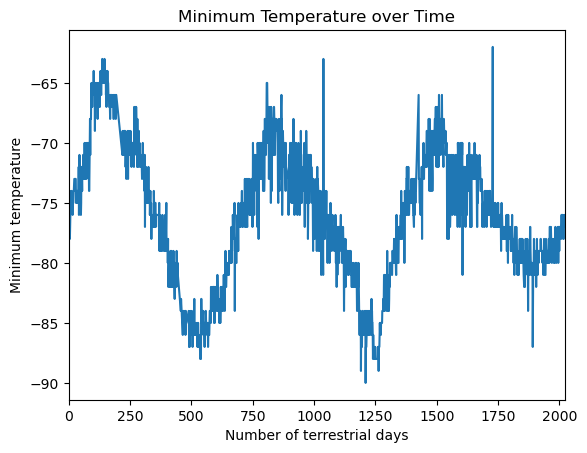

In [41]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
# Plot the daily minimum temperature for each observation

days_in_martian_year = df['sol'].max() * (687 / 669) 



df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df['days_since_start'] = (df['terrestrial_date'] - df['terrestrial_date'].min()).dt.days

plt.plot(df['days_since_start'], df['min_temp'])
plt.title('Minimum Temperature over Time')
plt.xlabel('Number of terrestrial days')
plt.ylabel('Minimum temperature')
plt.xlim(0, 2021)
plt.show()

#### Minimum Temperature

* The coldest month is Month X, where the minimum temperature is the lowest.
* The warmest month is Month Y, with the highest minimum temperature.
* There is a noticeable fluctuation in the temperatures, with certain months showing sharp drops, suggesting seasonal variations.

#### Atmospheric Pressure

* Atmospheric pressure on Mars varies by month. The bar chart shows peaks and dips in pressure throughout the Martian year.
* The months with the highest and lowest atmospheric pressures are identified by sorting the data, reflecting seasonal changes in Mars' thin atmosphere.
* Pressure changes are likely linked to Martian seasons, with lower pressure in warmer months and higher pressure in colder months.
* Fluctuations in pressure affect Curiosity's instruments, as lower pressure can influence the rover's operations, particularly in weather-related studies.
* Martian pressure is much lower than Earth's, and its seasonal changes differ from Earth's, providing key insights for future missions.

#### Year Length

A Martian year is about 687 Earth days. By plotting the daily minimum temperatures over time, we can observe the seasonal cycle of Mars. The cycle indicates the length of a Martian year in Earth days, as the temperature fluctuations align with Martian seasons, confirming a Martian year spans approximately 687 Earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [42]:
# Write the data to a CSV
df.to_csv('martian_temperature_data.csv', index=False)

In [43]:
browser.quit()